In [1]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras

In [2]:
(x_train, y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
y_test.shape

(10000,)

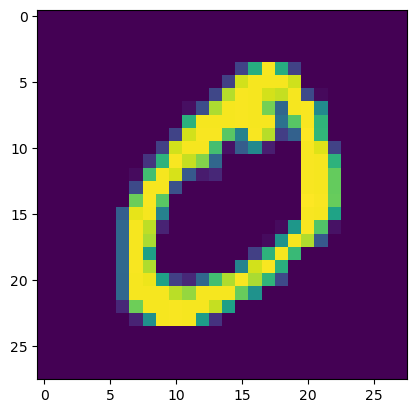

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])

In [8]:
y_train[1]

0

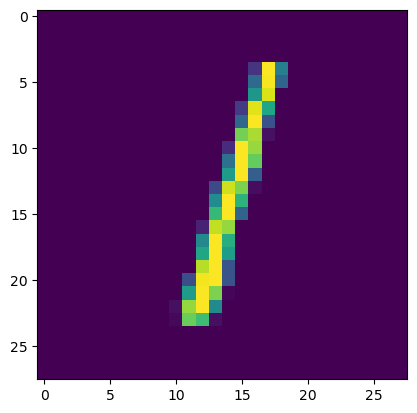

In [9]:
plt.imshow(x_test[2])

In [10]:
y_test[2]

1

In [11]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Scaling

In [12]:
x_train=x_train/255
x_test=x_test/255

In [13]:
x_train_flattened=x_train.reshape(60000, 28*28)
x_test_flattened=x_test.reshape(10000, 28*28)

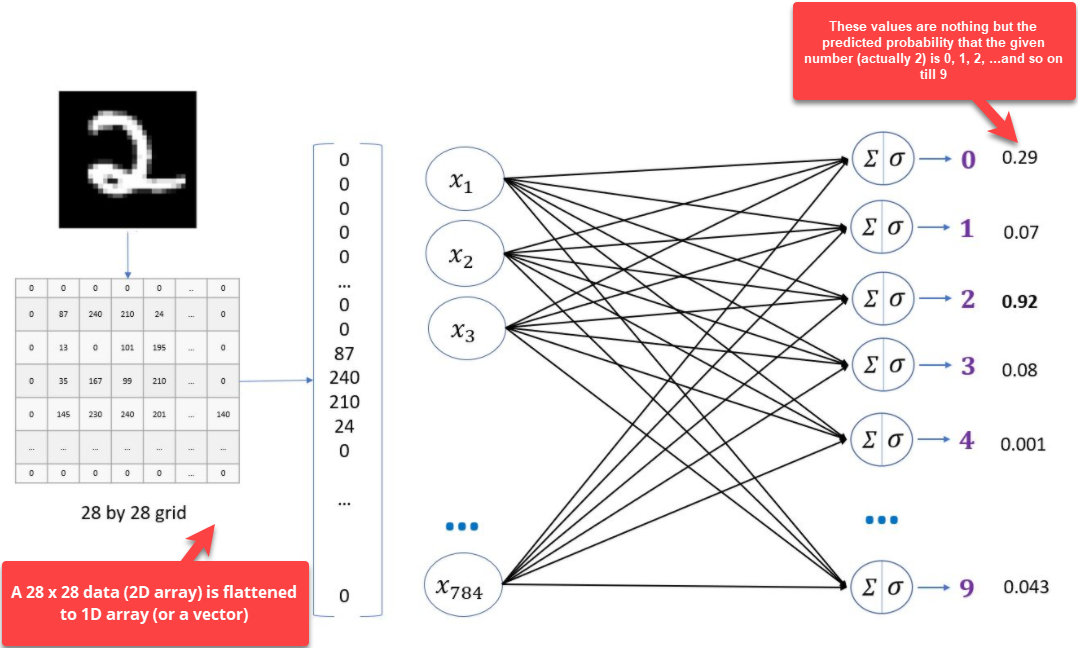

Build ANN Model

In [14]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8143 - loss: 0.7249
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9146 - loss: 0.3072
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9210 - loss: 0.2834
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9223 - loss: 0.2719
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9250 - loss: 0.2698


In [17]:
model.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9097 - loss: 0.3086


[0.27197515964508057, 0.9223999977111816]

Prediction

In [18]:
y_pred=model.predict(x_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step


In [19]:
y_pred[0]

array([2.3998084e-02, 3.0520840e-07, 5.6768399e-02, 9.6498275e-01,
       3.4038785e-03, 1.2106128e-01, 1.3446328e-06, 9.9982375e-01,
       9.3881309e-02, 6.0123914e-01], dtype=float32)

In [20]:
import numpy as np
np.argmax(y_pred[0])

7

In [21]:
y_test[0]

7

In [22]:
y_predicted=[]
for i in y_pred:
    y_predicted.append(np.argmax(i))
y_predicted[:5]

[7, 2, 1, 0, 4]

In [23]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [24]:
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_predicted)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    2,    2,    0,    5,    2,    2,    1,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   8,    9,  923,   18,   14,    3,    9,   10,   34,    4],
       [   1,    0,   19,  935,    3,   21,    1,   10,   12,    8],
       [   2,    1,    5,    1,  933,    0,    5,    3,    7,   25],
       [  11,    3,    3,   40,   12,  779,   10,    5,   24,    5],
       [  14,    3,    9,    1,   17,   22,  888,    2,    2,    0],
       [   2,    7,   22,    7,   10,    0,    0,  951,    1,   28],
       [   8,   11,    7,   36,   11,   40,    9,   14,  833,    5],
       [  11,    7,    1,   12,   41,    8,    0,   27,    3,  899]])>

Text(95.72222222222221, 0.5, 'Truth')

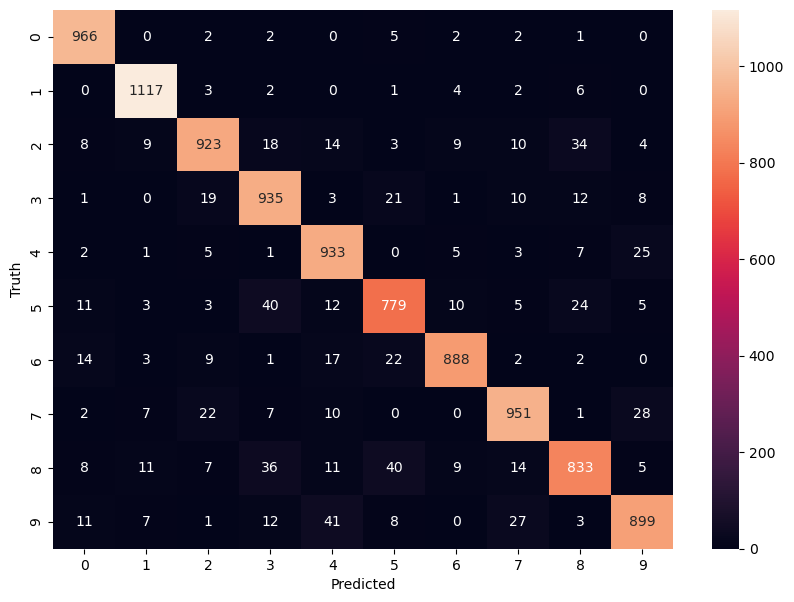

In [25]:
import seaborn as sns 
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

using hidden layer

In [26]:
model2=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [28]:
model2.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8721 - loss: 0.4561
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9625 - loss: 0.1318
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9715 - loss: 0.0930
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9800 - loss: 0.0669
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9848 - loss: 0.0496


In [29]:
model2.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9729 - loss: 0.0892


[0.0743546113371849, 0.9768000245094299]

Prediction

In [30]:
y_pred=model2.predict(x_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step


In [31]:
y_pred[0]

array([5.3521082e-02, 2.0423661e-04, 5.8266904e-02, 8.8156432e-01,
       3.0321414e-07, 8.0614155e-03, 2.5949698e-08, 9.9987537e-01,
       5.4518259e-03, 1.8710940e-01], dtype=float32)

In [32]:
np.argmax(y_pred[0])

7

In [33]:
y_test[0]

7

In [34]:
y_predicted=[]
for i in y_pred:
    y_predicted.append(np.argmax(i))
y_predicted[:5]

[7, 2, 1, 0, 4]

In [35]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [36]:
cm1=tf.math.confusion_matrix(labels=y_test, predictions=y_predicted)
cm1

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    2,    1,    0,    3,    1,    1,    1,    1],
       [   0, 1125,    2,    1,    0,    1,    2,    0,    4,    0],
       [   6,    1, 1007,    1,    1,    0,    2,    7,    7,    0],
       [   1,    1,    1,  994,    0,    5,    0,    5,    2,    1],
       [   2,    0,    8,    0,  937,    1,    4,    6,    1,   23],
       [   2,    0,    0,    5,    0,  870,    5,    2,    7,    1],
       [   4,    2,    2,    0,    2,    4,  941,    0,    3,    0],
       [   2,    3,   11,    1,    0,    0,    0, 1008,    0,    3],
       [   4,    0,    5,    8,    3,    6,    1,    6,  938,    3],
       [   4,    7,    0,    7,    2,    5,    0,    5,    1,  978]])>

Text(95.72222222222221, 0.5, 'Truth')

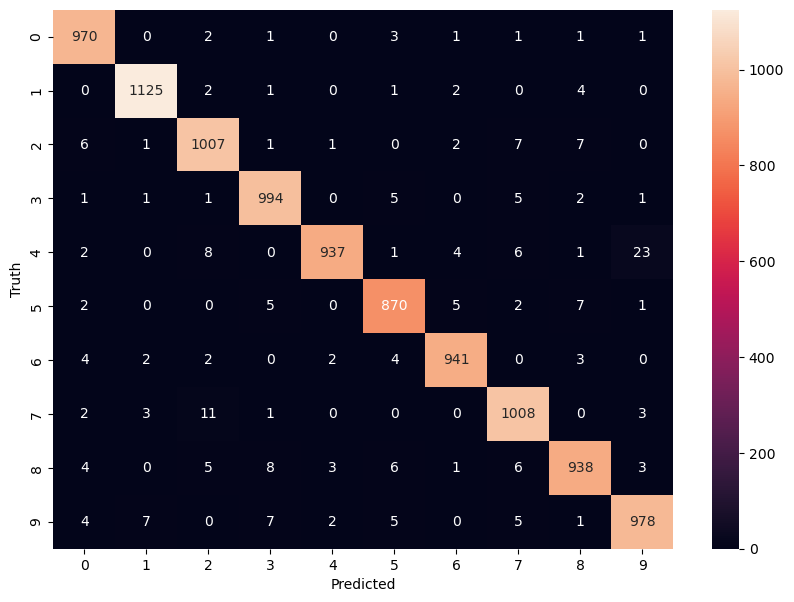

In [37]:
plt.figure(figsize=(10,7))
sns.heatmap(cm1, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

using another hidden layer

In [38]:
model3=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [40]:
model3.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8722 - loss: 0.4570
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9600 - loss: 0.1387
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9718 - loss: 0.0942
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9783 - loss: 0.0697
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9843 - loss: 0.0526


In [41]:
model3.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9706 - loss: 0.1041


[0.08976245671510696, 0.9743000268936157]

Prediction 

In [42]:
y_pred=model3.predict(x_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step


In [43]:
y_pred[0]

array([5.8210389e-05, 2.5495172e-05, 4.2240748e-01, 7.2224498e-01,
       8.3510821e-07, 3.6993586e-03, 2.7315419e-10, 9.9995774e-01,
       4.6687294e-02, 3.6710508e-02], dtype=float32)

In [44]:
np.argmax(y_pred[0])

7

In [45]:
y_test[0]

7

In [46]:
y_predicted=[]
for i in y_pred:
    y_predicted.append(np.argmax(i))
y_predicted[:5]

[7, 2, 1, 0, 4]

In [47]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [48]:
cm3=tf.math.confusion_matrix(labels=y_test, predictions=y_predicted)
cm3

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    5,    1,    1,    0,    1,    4,    2,    4],
       [   0, 1114,    5,    2,    0,    1,    4,    1,    8,    0],
       [   2,    0, 1016,    2,    1,    0,    2,    4,    5,    0],
       [   0,    0,    4,  991,    0,    4,    0,    6,    4,    1],
       [   0,    0,    5,    0,  958,    1,    5,    2,    3,    8],
       [   2,    0,    0,   13,    1,  861,    6,    1,    6,    2],
       [   5,    2,    1,    1,    5,    3,  937,    0,    4,    0],
       [   1,    3,   20,    6,    0,    0,    0,  995,    1,    2],
       [   4,    0,    9,   10,    1,    3,    2,    3,  941,    1],
       [   0,    6,    2,    8,    6,    1,    2,    9,    7,  968]])>

Text(95.72222222222221, 0.5, 'Truth')

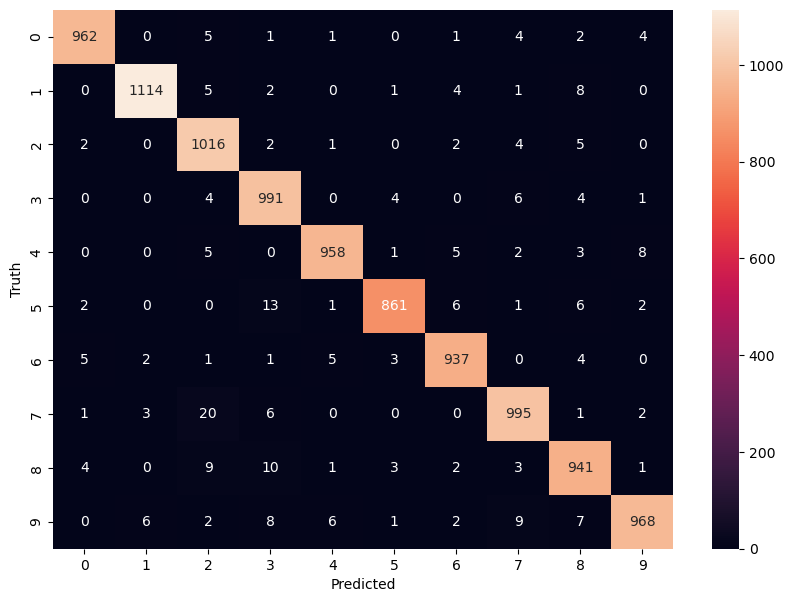

In [49]:
plt.figure(figsize=(10,7))
sns.heatmap(cm3, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

Summary: 